<a href="https://www.kaggle.com/code/risakashiwabara/eda-scatterplots?scriptVersionId=200696796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<p><center style="color:#006400; font-family:Cormorant Garamond; font-size:30px;">👀Thanks for visiting my notebook👀 </center></p>

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/ThMds3yR/publicdomainq-0034707.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/ThMds3yR/publicdomainq-0034707.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">Data</p>

In [2]:
data_man = pd.read_csv('/kaggle/input/jpmean-and-standard-deviation-of-height-and-weight/man.csv')

In [3]:
data_woman = pd.read_csv('/kaggle/input/jpmean-and-standard-deviation-of-height-and-weight/woman.csv')

In [4]:
df = pd.read_csv('/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv')
df.head(5)

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


In [5]:
df_disastrous = pd.read_csv('/kaggle/input/taiwan-earthquake-dataset/disastrous earthquake.csv')
df_disastrous.head(3)

,Date,Location,Latitude,Longitude,Depth (km),Magnitude,Casualties,Injured,Missing,Collapsed building
0,1720-10-31,Tainan,23.4,120.5,-,6.0,many deaths,NaN,NaN,NaN
1,1736-01-30,Tainan-Jiayi,23.1,120.3,-,7.0,372,NaN,NaN,689
2,1776-12-11,Jiayi,-,-,-,-,many deaths,NaN,NaN,NaN


In [6]:
poke_df = pd.read_csv('/kaggle/input/pokmon-dataset-for-analysis/pokemon.csv')
poke_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,GRASS\nPOISON,318,45,49,49,65,65,45
1,2,Ivysaur,GRASS\nPOISON,405,60,62,63,80,80,60
2,3,Venusaur,GRASS\nPOISON,525,80,82,83,100,100,80
3,3,Venusaur\nMega Venusaur,GRASS\nPOISON,625,80,100,123,122,120,80
4,4,Charmander,FIRE,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1190,1006,Iron Valiant,FAIRY\nFIGHTING,590,74,130,90,120,60,116
1191,1007,Koraidon,FIGHTING\nDRAGON,670,100,135,115,85,100,135
1192,1008,Miraidon,ELECTRIC\nDRAGON,670,100,85,100,135,115,135
1193,1009,Walking Wake,WATER\nDRAGON,590,99,83,91,125,83,109


<a id="3"></a>
# <p style="padding:20px;background-color:#8fbc8f ;margin:0;color:#f2e9e4;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #fefae0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">scatter plot-1 </p>

/tmp/ipykernel_20/3148775775.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Total Matches')


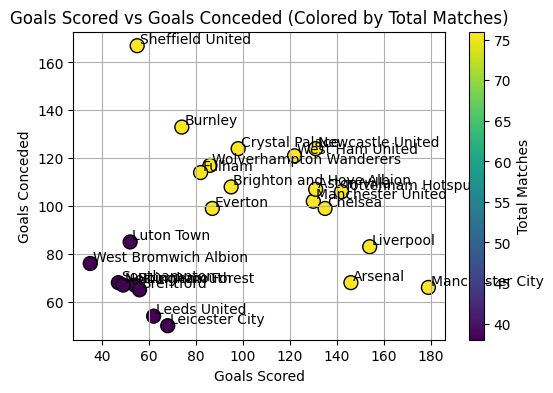

In [7]:

# Calculate total matches (wins + draws + losses)
df['total_matches'] = df['wins'] + df['draws'] + df['losses']


norm = plt.Normalize(df['total_matches'].min(), df['total_matches'].max())
colors = plt.cm.viridis(norm(df['total_matches']))


plt.figure(figsize=(6, 4))
plt.scatter(df['goals_scored'], df['goals_conceded'], color=colors, s=100, edgecolor='black')

# Add labels for each point
for i, team in enumerate(df['team']):
    plt.text(df['goals_scored'][i] + 1, df['goals_conceded'][i] + 1, team)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Total Matches')

plt.title('Goals Scored vs Goals Conceded (Colored by Total Matches)')
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')
plt.grid(True)
plt.show()

<a id="3"></a>
# <p style="padding:20px;background-color:#fa8072 ;margin:0;color:#f2e9e4;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #fefae0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">scattergraph : px.scatter() </p>

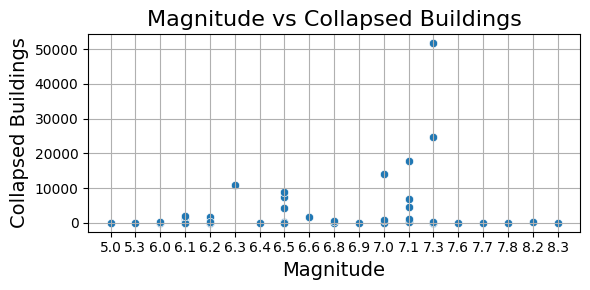

In [8]:
df_sorted = df_disastrous[['Casualties', 'Collapsed building', 'Magnitude']].dropna().sort_values(by=['Magnitude', 'Casualties', 'Collapsed building'])

df_sorted['Collapsed building'] = df_sorted['Collapsed building'].astype(int)

plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_sorted, x='Magnitude', y='Collapsed building')

plt.title('Magnitude vs Collapsed Buildings', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Collapsed Buildings', fontsize=14)

plt.grid(True)

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Status vs Total</p>

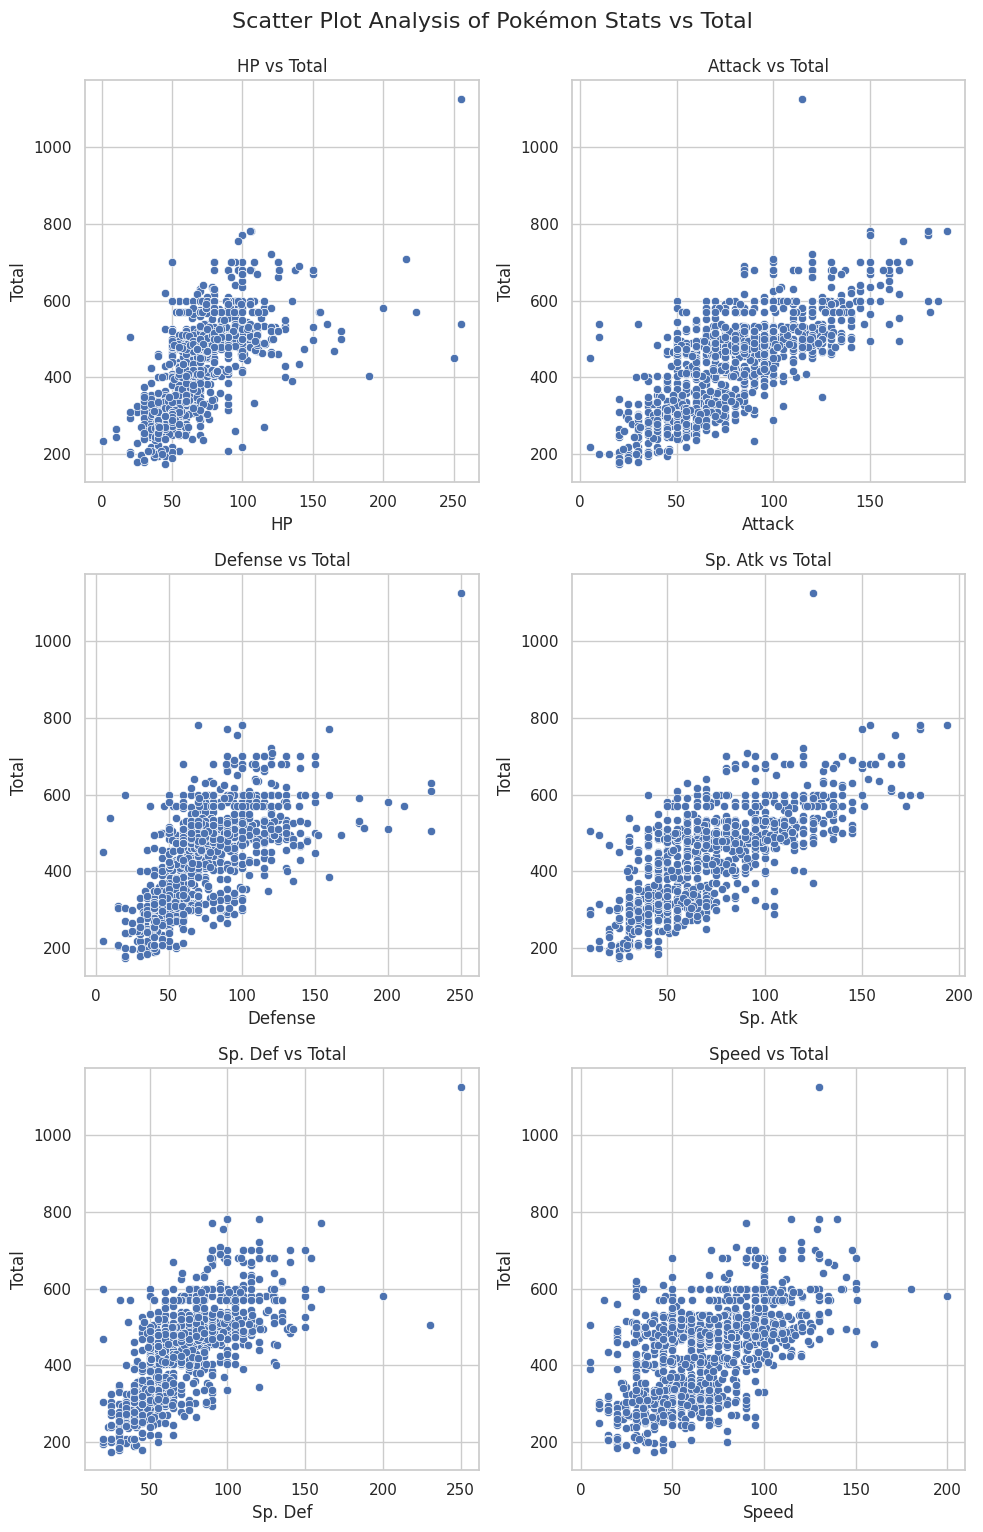

In [9]:
# Setting up the plot style
sns.set(style="whitegrid")

# Adjusting the pairplot to display the scatter plots in a 2x3 grid (2 columns and 3 rows)
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Flattening the 2D array of axes for easier iteration
axs = axs.flatten()

# Creating scatter plots for each stat against Total
stat_columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
for i, stat in enumerate(stat_columns):
    sns.scatterplot(x=poke_df[stat], y=poke_df["Total"], ax=axs[i])
    axs[i].set_title(f"{stat} vs Total")
    axs[i].set_xlabel(stat)
    axs[i].set_ylabel("Total")

# Adjusting layout to prevent overlap
plt.tight_layout()

# Adding a main title
fig.suptitle("Scatter Plot Analysis of Pokémon Stats vs Total", y=1.02, fontsize=16)

# Displaying the plot
plt.show()


<a id="3"></a>
# <p style="padding:20px;background-color:#ffd700;margin:0;color:#191970;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #fefae0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">scatter plot-3 </p>

<Axes: xlabel='height_average', ylabel='body weight _average'>

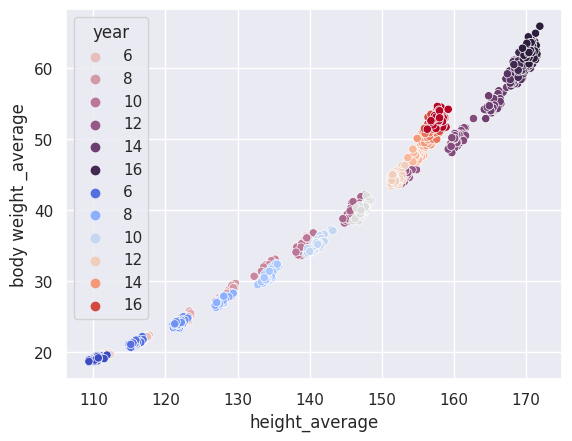

In [10]:
sns.set()
sns.scatterplot(x='height_average', y='body weight _average', hue='year', data=data_man)
sns.scatterplot(x='height_average_1', y='body weight _average_3', hue='year', data=data_woman, palette="coolwarm")

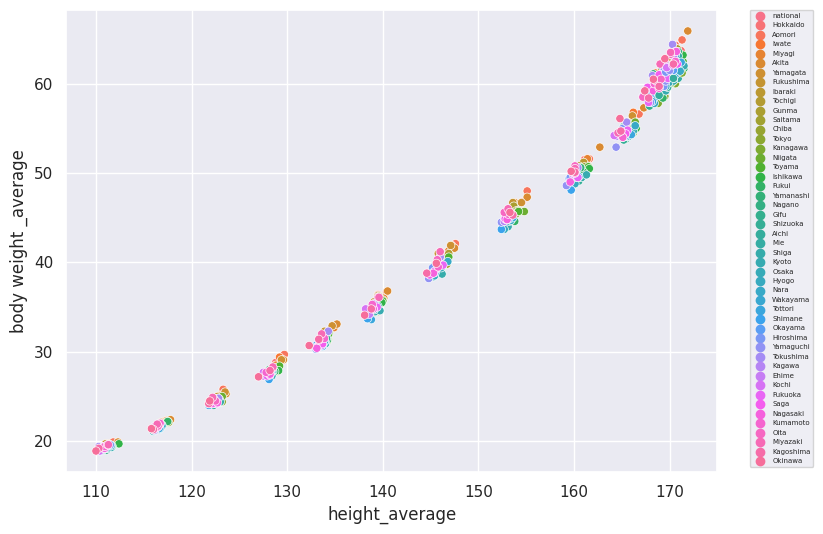

In [11]:
data_man["category_age"] = data_man["category"].str.cat(data_man["year"].astype(str), sep="_")
group_order = sorted(data_man["category_age"].unique())
category = data_man["category"].unique()
plt.figure(figsize=(8.4, 6))
sns.scatterplot(x="height_average", y="body weight _average", data=data_man, hue="category", hue_order=category)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=5)
plt.show()

In [12]:
data_man['BMI'] = data_man['body weight _average'] / (data_man['height_average'] ** 2)*10000

<Axes: xlabel='body weight _average', ylabel='BMI'>

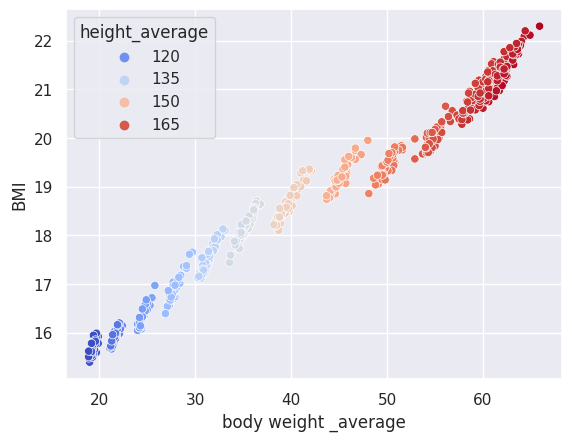

In [13]:
sns.set()
sns.scatterplot(x='body weight _average', y='BMI', hue='height_average', data=data_man, palette="coolwarm")